In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [7]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [8]:
mensual_p = mensual['n_trips']

In [9]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [10]:
mensual_p = mensual_p.reset_index()

In [11]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [32]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 1000, mcmc_samples=100, interval_width= 0.7, seasonality_prior_scale=1,changepoint_prior_scale =0.06)

# Entrenamos el modelo
prophet_1.fit(mensual_p)

mape = 0.05
cov = 1
n = 12
while mape < 0.08 and cov > 0.9:
  mape_pre = mape
  cov_pre = cov
  forecast_pre = forecast_1
  df_cv_pre = df_cv_1
  df_p_pre = df_p_1
  build_forecast = prophet_1.make_future_dataframe(periods=n, freq='M') #
  forecast_1 = prophet_1.predict(build_forecast)
  df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')
  df_p_1 = performance_metrics(df_cv_1)
  mape = df_p_1.mape.mean()
  cov = df_p_1.coverage.mean()
  n += 6

print('Prediccion de hasta', (n-6)/12, 'años')
print('El mape es:', mape_pre)
print('El coverage es:', cov_pre)

forecast_pre

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/3ia2rjua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/msln1lsw.json
03:04:04 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=63370', 'data', 'file=/tmp/tmpo1459kda/3ia2rjua.json', 'init=/tmp/tmpo1459kda/msln1lsw.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelvayvpbh5/prophet_model-20241119030404_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=63370', 'data', 'file=/tmp/tmpo1459kda/3ia2rjua.json', 'init=/tmp/tmpo1459kda/msln1lsw.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelvayvpbh5/prophet_model-20241119030404_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:04:06 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=63370', 'data', 'file=/tmp/tmpo1459kda/3ia2rjua.json', 'init=/tmp/tmpo1459kda/msln1lsw.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelvayvpbh5/prophet_model-20241119030404_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_modelvayvpbh5/prophet_model-20241119030404_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_modelvayvpbh5/prophet_model-20241119030404_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/ss5hkeh7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/o7grjtgr.json
03:04:06 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=6784', 'data', 'file=/tmp/tmpo1459kda/ss5hkeh7.json', 'init=/tmp/tmpo1459kda/o7grjtgr.json', 'output', 'file=/tmp/tmpo1459kda/prophet_model3e573jxp/prophet_model-20241119030406_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=6784', 'data', 'file=/tmp/tmpo1459kda/ss5hkeh7.json', 'init=/tmp/tmpo1459kda/o7grjtgr.json', 'output', 'file=/tmp/tmpo1459kda/prophet_model3e573jxp/prophet_model-20241119030406_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:

03:04:09 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=6784', 'data', 'file=/tmp/tmpo1459kda/ss5hkeh7.json', 'init=/tmp/tmpo1459kda/o7grjtgr.json', 'output', 'file=/tmp/tmpo1459kda/prophet_model3e573jxp/prophet_model-20241119030406_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_model3e573jxp/prophet_model-20241119030406_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_model3e573jxp/prophet_model-20241119030406_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)
 

INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/ig8bbspn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/hayre4u2.json
03:04:10 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=37507', 'data', 'file=/tmp/tmpo1459kda/ig8bbspn.json', 'init=/tmp/tmpo1459kda/hayre4u2.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelji8pyj4a/prophet_model-20241119030410_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=37507', 'data', 'file=/tmp/tmpo1459kda/ig8bbspn.json', 'init=/tmp/tmpo1459kda/hayre4u2.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelji8pyj4a/prophet_model-20241119030410_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:04:13 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=37507', 'data', 'file=/tmp/tmpo1459kda/ig8bbspn.json', 'init=/tmp/tmpo1459kda/hayre4u2.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelji8pyj4a/prophet_model-20241119030410_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_modelji8pyj4a/prophet_model-20241119030410_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_modelji8pyj4a/prophet_model-20241119030410_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/c95o52ys.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/h18pux09.json
03:04:13 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=83422', 'data', 'file=/tmp/tmpo1459kda/c95o52ys.json', 'init=/tmp/tmpo1459kda/h18pux09.json', 'output', 'file=/tmp/tmpo1459kda/prophet_model7xy0hdji/prophet_model-20241119030413_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=83422', 'data', 'file=/tmp/tmpo1459kda/c95o52ys.json', 'init=/tmp/tmpo1459kda/h18pux09.json', 'output', 'file=/tmp/tmpo1459kda/prophet_model7xy0hdji/prophet_model-20241119030413_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:04:15 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=83422', 'data', 'file=/tmp/tmpo1459kda/c95o52ys.json', 'init=/tmp/tmpo1459kda/h18pux09.json', 'output', 'file=/tmp/tmpo1459kda/prophet_model7xy0hdji/prophet_model-20241119030413_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_model7xy0hdji/prophet_model-20241119030413_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_model7xy0hdji/prophet_model-20241119030413_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/a23t102l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/abw4w_g8.json
03:04:16 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=61910', 'data', 'file=/tmp/tmpo1459kda/a23t102l.json', 'init=/tmp/tmpo1459kda/abw4w_g8.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modeloxtv3zq5/prophet_model-20241119030416_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=61910', 'data', 'file=/tmp/tmpo1459kda/a23t102l.json', 'init=/tmp/tmpo1459kda/abw4w_g8.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modeloxtv3zq5/prophet_model-20241119030416_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:04:18 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=61910', 'data', 'file=/tmp/tmpo1459kda/a23t102l.json', 'init=/tmp/tmpo1459kda/abw4w_g8.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modeloxtv3zq5/prophet_model-20241119030416_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_modeloxtv3zq5/prophet_model-20241119030416_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_modeloxtv3zq5/prophet_model-20241119030416_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/4nmox0cw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/0yuh9l08.json
03:04:19 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=29804', 'data', 'file=/tmp/tmpo1459kda/4nmox0cw.json', 'init=/tmp/tmpo1459kda/0yuh9l08.json', 'output', 'file=/tmp/tmpo1459kda/prophet_model6mexji_8/prophet_model-20241119030419_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=29804', 'data', 'file=/tmp/tmpo1459kda/4nmox0cw.json', 'init=/tmp/tmpo1459kda/0yuh9l08.json', 'output', 'file=/tmp/tmpo1459kda/prophet_model6mexji_8/prophet_model-20241119030419_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:04:22 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=29804', 'data', 'file=/tmp/tmpo1459kda/4nmox0cw.json', 'init=/tmp/tmpo1459kda/0yuh9l08.json', 'output', 'file=/tmp/tmpo1459kda/prophet_model6mexji_8/prophet_model-20241119030419_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_model6mexji_8/prophet_model-20241119030419_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_model6mexji_8/prophet_model-20241119030419_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/9fp2qyly.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/fcpl9oqd.json
03:04:24 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=79789', 'data', 'file=/tmp/tmpo1459kda/9fp2qyly.json', 'init=/tmp/tmpo1459kda/fcpl9oqd.json', 'output', 'file=/tmp/tmpo1459kda/prophet_model6im3duf0/prophet_model-20241119030424_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=79789', 'data', 'file=/tmp/tmpo1459kda/9fp2qyly.json', 'init=/tmp/tmpo1459kda/fcpl9oqd.json', 'output', 'file=/tmp/tmpo1459kda/prophet_model6im3duf0/prophet_model-20241119030424_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:04:26 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=79789', 'data', 'file=/tmp/tmpo1459kda/9fp2qyly.json', 'init=/tmp/tmpo1459kda/fcpl9oqd.json', 'output', 'file=/tmp/tmpo1459kda/prophet_model6im3duf0/prophet_model-20241119030424_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_model6im3duf0/prophet_model-20241119030424_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_model6im3duf0/prophet_model-20241119030424_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/j_lz8jtt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/5rjdo5pl.json
03:04:27 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=21580', 'data', 'file=/tmp/tmpo1459kda/j_lz8jtt.json', 'init=/tmp/tmpo1459kda/5rjdo5pl.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelh3t9msax/prophet_model-20241119030427_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=21580', 'data', 'file=/tmp/tmpo1459kda/j_lz8jtt.json', 'init=/tmp/tmpo1459kda/5rjdo5pl.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelh3t9msax/prophet_model-20241119030427_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:04:29 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=21580', 'data', 'file=/tmp/tmpo1459kda/j_lz8jtt.json', 'init=/tmp/tmpo1459kda/5rjdo5pl.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelh3t9msax/prophet_model-20241119030427_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_modelh3t9msax/prophet_model-20241119030427_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_modelh3t9msax/prophet_model-20241119030427_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/ryelmeic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo1459kda/5ii36_wq.json
03:04:30 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=38014', 'data', 'file=/tmp/tmpo1459kda/ryelmeic.json', 'init=/tmp/tmpo1459kda/5ii36_wq.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelmg3o6scp/prophet_model-20241119030430_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=38014', 'data', 'file=/tmp/tmpo1459kda/ryelmeic.json', 'init=/tmp/tmpo1459kda/5ii36_wq.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelmg3o6scp/prophet_model-20241119030430_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:04:32 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=38014', 'data', 'file=/tmp/tmpo1459kda/ryelmeic.json', 'init=/tmp/tmpo1459kda/5ii36_wq.json', 'output', 'file=/tmp/tmpo1459kda/prophet_modelmg3o6scp/prophet_model-20241119030430_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpo1459kda/prophet_modelmg3o6scp/prophet_model-20241119030430_1.csv
 console_msgs (if any):
	/tmp/tmpo1459kda/prophet_modelmg3o6scp/prophet_model-20241119030430_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)



Prediccion de hasta 4.5 años
El mape es: 0.07817724366723865
El coverage es: 0.9166666666666666


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,2.834319e+06,2.993683e+06,3.170888e+06,2.777431e+06,2.890666e+06,243644.919572,181448.141503,303668.498647,243644.919572,181448.141503,303668.498647,0.0,0.0,0.0,3.077964e+06
1,2022-04-30,2.820204e+06,2.883094e+06,3.066497e+06,2.769770e+06,2.866508e+06,156216.395578,106655.879382,210646.110275,156216.395578,106655.879382,210646.110275,0.0,0.0,0.0,2.976420e+06
2,2022-05-31,2.804938e+06,2.946533e+06,3.123892e+06,2.756506e+06,2.845235e+06,230259.380991,173470.390520,290865.340541,230259.380991,173470.390520,290865.340541,0.0,0.0,0.0,3.035197e+06
3,2022-06-30,2.792028e+06,2.819536e+06,2.998318e+06,2.749537e+06,2.830072e+06,123525.821622,75518.219703,175948.527307,123525.821622,75518.219703,175948.527307,0.0,0.0,0.0,2.915554e+06
4,2022-07-31,2.779127e+06,2.501537e+06,2.691352e+06,2.738474e+06,2.817893e+06,-183677.946241,-230936.894353,-124069.863610,-183677.946241,-230936.894353,-124069.863610,0.0,0.0,0.0,2.595449e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2028-04-30,3.340783e+06,2.127154e+06,4.969985e+06,1.963970e+06,4.811004e+06,175573.082256,116312.875059,239701.761541,175573.082256,116312.875059,239701.761541,0.0,0.0,0.0,3.516356e+06
74,2028-05-31,3.356272e+06,2.172806e+06,5.077954e+06,1.918068e+06,4.877449e+06,226424.723252,147710.602622,302928.715361,226424.723252,147710.602622,302928.715361,0.0,0.0,0.0,3.582697e+06
75,2028-06-30,3.371262e+06,2.025081e+06,5.061325e+06,1.897888e+06,4.927656e+06,111562.744903,39440.556787,181375.587642,111562.744903,39440.556787,181375.587642,0.0,0.0,0.0,3.482825e+06
76,2028-07-31,3.386752e+06,1.595045e+06,4.683933e+06,1.862711e+06,4.980043e+06,-258930.158931,-346643.532400,-178319.896656,-258930.158931,-346643.532400,-178319.896656,0.0,0.0,0.0,3.127822e+06


In [25]:
print('Prediccion de hasta',n/12, 'años')
print('El mape es:', mape)
print('El coverage es:', cov)

Prediccion de hasta 4.0 años
El mape es: 0.08509597574267404
El coverage es: 0.9166666666666666


In [33]:
forecast_pre.to_csv('forecast_mensual_4.5.csv')

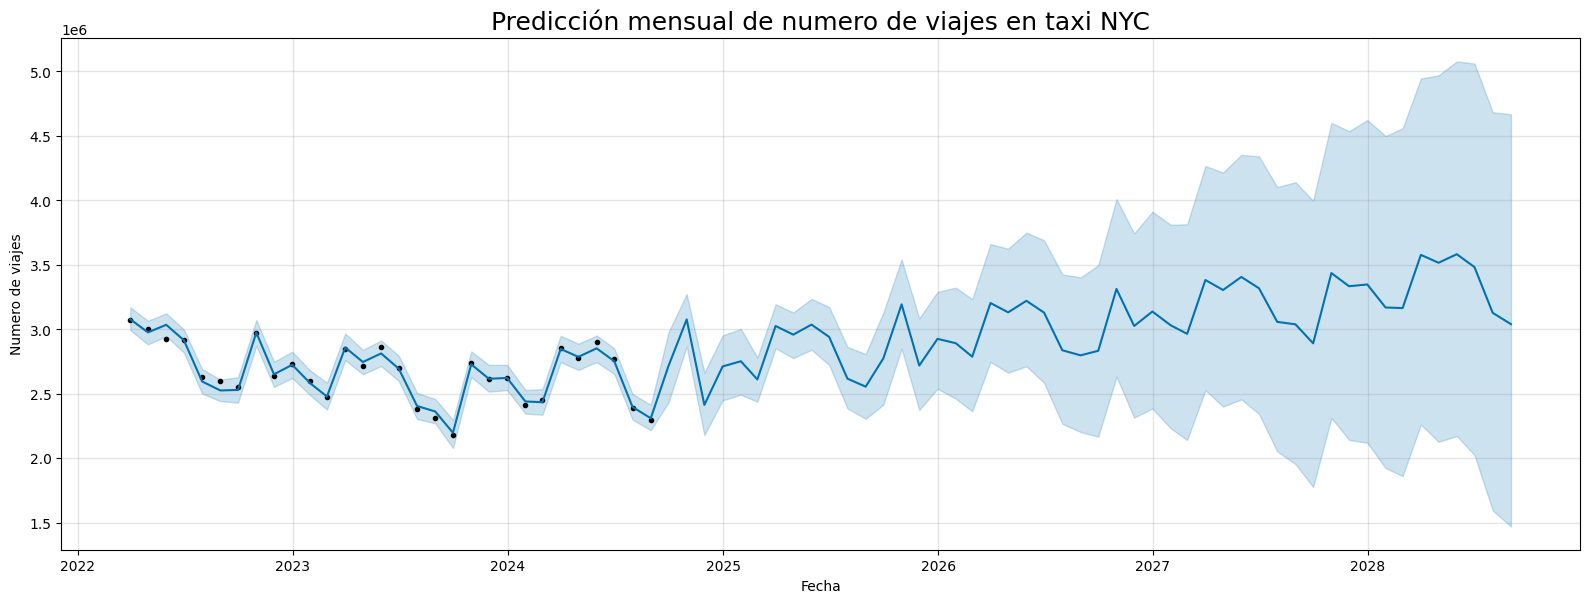

In [34]:
prophet_1.plot(forecast_pre, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

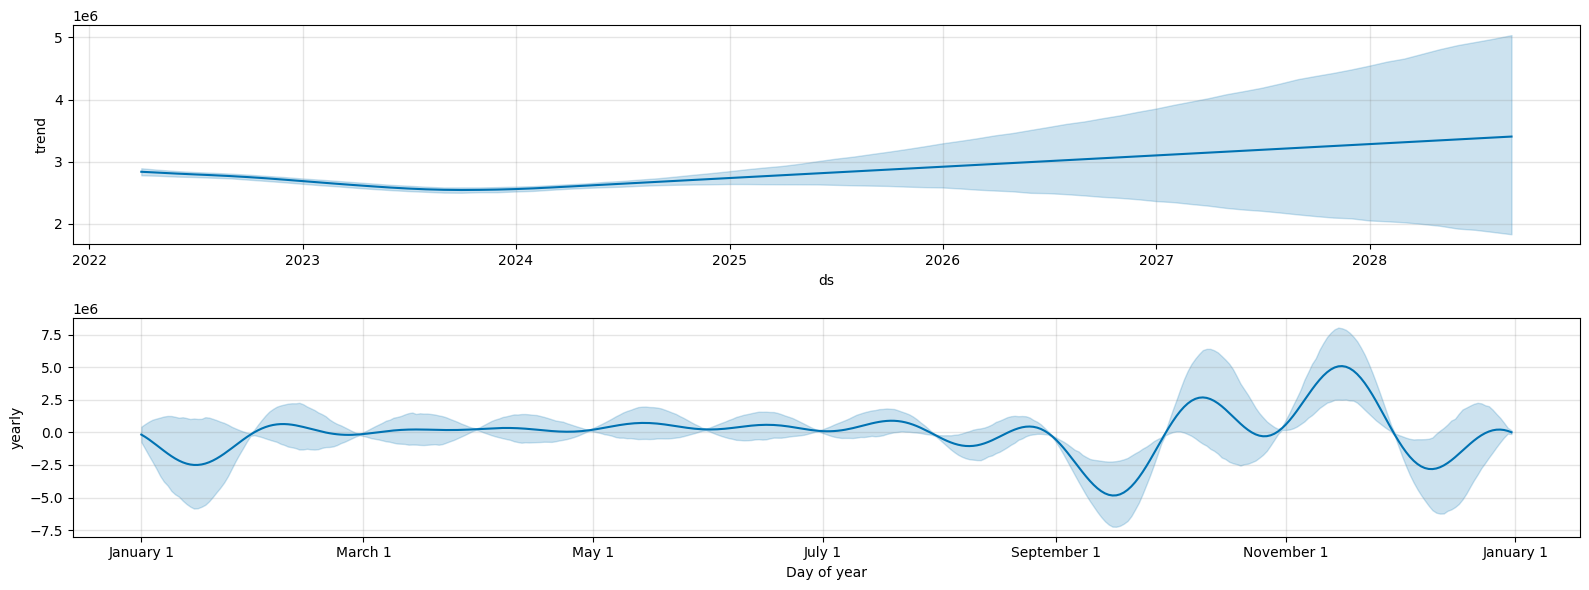

In [35]:
components = prophet_1.plot_components(forecast_pre, figsize=(16,6))

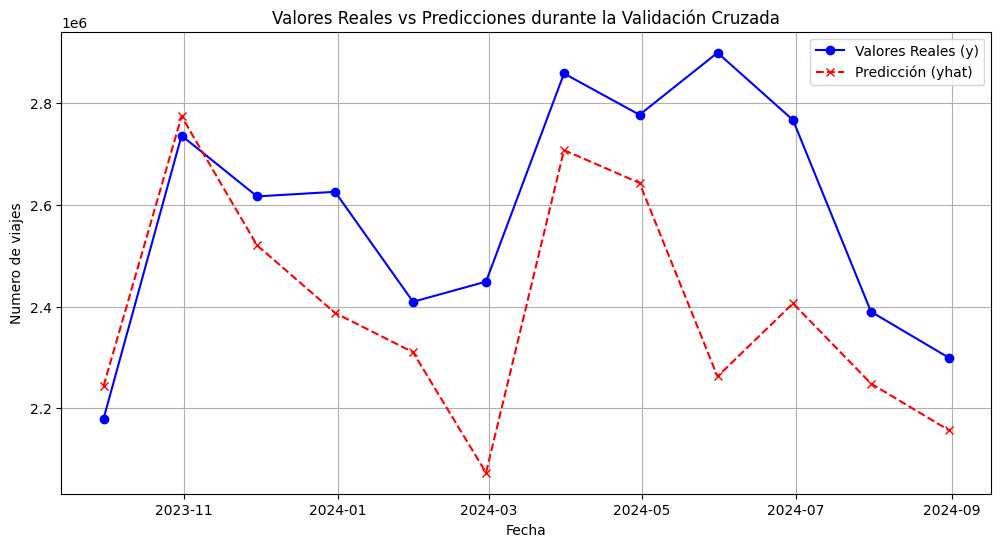

In [36]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_pre['ds'], df_cv_pre['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_pre['ds'], df_cv_pre['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()

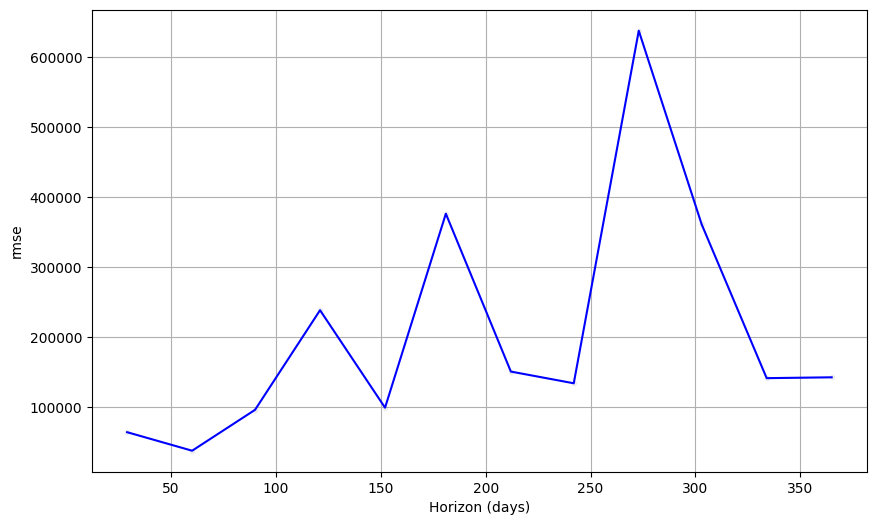

In [37]:
fig = plot_cross_validation_metric(df_cv_pre, metric='rmse')

In [38]:
df_p_pre.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,196 days 20:00:00,7.002399e+10,206600.600640,206600.600640,0.078177,0.078177,0.083241,0.916667
std,109 days 20:33:46.987269072,1.160219e+11,172701.060065,172701.060065,0.060579,0.060579,0.068355,0.288675
min,29 days 00:00:00,1.433923e+09,37867.171307,37867.171307,0.013838,0.013838,0.013743,0.000000
25%,113 days 06:00:00,9.708975e+09,98525.111074,98525.111074,0.040102,0.040102,0.040924,1.000000
50%,196 days 12:00:00,2.017199e+10,142026.861106,142026.861106,0.055969,0.055969,0.057586,1.000000
75%,280 days 12:00:00,7.517491e+10,268999.613988,268999.613988,0.100692,0.100692,0.106204,1.000000
max,365 days 00:00:00,4.060298e+11,637204.641091,637204.641091,0.219761,0.219761,0.246889,1.000000
